## Import necessary libraries

In [67]:
# Import necessary libraries
import sys
import os
import logging

# Append the scripts directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import custom modules
from data_loading import load_data
from data_quality import check_data_quality
from data_cleaning import preprocess_data

## Configure logging

In [68]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

## Load the data

In [69]:
# Load the data
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'
store_path = '../data/raw/store.csv'
train, test, store = load_data(train_path, test_path, store_path)

d:\sales_forecasting\scripts\data_loading.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)
2024-05-28 15:31:23,745 - INFO - Data loaded successfully


In [70]:
# Check data quality
train_quality = check_data_quality(train)

# Display data quality information
print("Train Data Head:")
print(train_quality['head'])
print("\nTrain Data Types:")
print(train_quality['dtypes'])
print("\nTrain Missing Values:")
print(train_quality['missing_values'])

2024-05-28 15:31:25,893 - INFO - Data quality check completed


Train Data Head:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Train Data Types:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Train Missing Values:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo   

In [71]:
test_quality = check_data_quality(test)

print("\nTest Data Head:")
print(test_quality['head'])
print("\nTest Data Types:")
print(test_quality['dtypes'])
print("\nTest Missing Values:")
print(test_quality['missing_values'])

2024-05-28 15:31:29,992 - INFO - Data quality check completed



Test Data Head:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

Test Data Types:
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

Test Missing Values:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [72]:
store_quality = check_data_quality(store)

print("\nStore Data Head:")
print(store_quality['head'])
print("\nStore Data Types:")
print(store_quality['dtypes'])
print("\nStore Missing Values:")
print(store_quality['missing_values'])


2024-05-28 15:31:33,295 - INFO - Data quality check completed



Store Data Head:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul

In [73]:
# Data cleaning
train_clean = preprocess_data(train, store)
test_clean = preprocess_data(test, store)

# Further EDA tasks to be added here...

d:\sales_forecasting\scripts\data_cleaning.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
d:\sales_forecasting\scripts\data_cleaning.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [74]:
# Check for remaining missing values after cleaning
train_clean_quality = check_data_quality(train_clean)
test_clean_quality = check_data_quality(test_clean)

2024-05-28 15:31:43,024 - INFO - Data quality check completed
2024-05-28 15:31:43,065 - INFO - Data quality check completed


In [75]:
# Display remaining missing values
print("\nTrain Data Missing Values After Cleaning:")
print(train_clean_quality['missing_values'])


Train Data Missing Values After Cleaning:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
dtype: int64


In [76]:
print("\nTest Data Missing Values After Cleaning:")
print(test_clean_quality['missing_values'])


Test Data Missing Values After Cleaning:
Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
Year                          0
Month                         0
Day                           0
WeekOfYear                    0
dtype: int64


## Setup and Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load the data
def load_data():
    train = pd.read_csv('../data/raw/train.csv')
    test = pd.read_csv('../data/raw/test.csv')
    store = pd.read_csv('../data/raw/store.csv')
    return train, test, store

train, test, store = load_data()
logger.info("Data loaded successfully")

C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_22276\1105372736.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/raw/train.csv')
2024-05-28 14:10:02,468 - INFO - Data loaded successfully


## Data Cleaning
### We will preprocess the data to handle missing values, outliers, and ensure correct data types.

In [2]:
def preprocess_data(df, store_df):
    # Merge with store data
    df = pd.merge(df, store_df, how='left', on='Store')
    
    # Fill missing values
    df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
    df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
    df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
    df['Promo2SinceWeek'].fillna(0, inplace=True)
    df['Promo2SinceYear'].fillna(0, inplace=True)
    df['PromoInterval'].fillna('', inplace=True)
    
    # Convert date columns to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract date features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    
    # Encode categorical variables
    df['StateHoliday'] = df['StateHoliday'].astype(str)
    df['StoreType'] = df['StoreType'].astype(str)
    df['Assortment'] = df['Assortment'].astype(str)
    df['PromoInterval'] = df['PromoInterval'].astype(str)
    
    logger.info("Data preprocessed successfully")
    return df

train = preprocess_data(train, store)
test = preprocess_data(test, store)

C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_22276\890839207.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_22276\890839207.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

## Exploratory Data Analysis
### Distribution of Promotions in Training and Test Sets

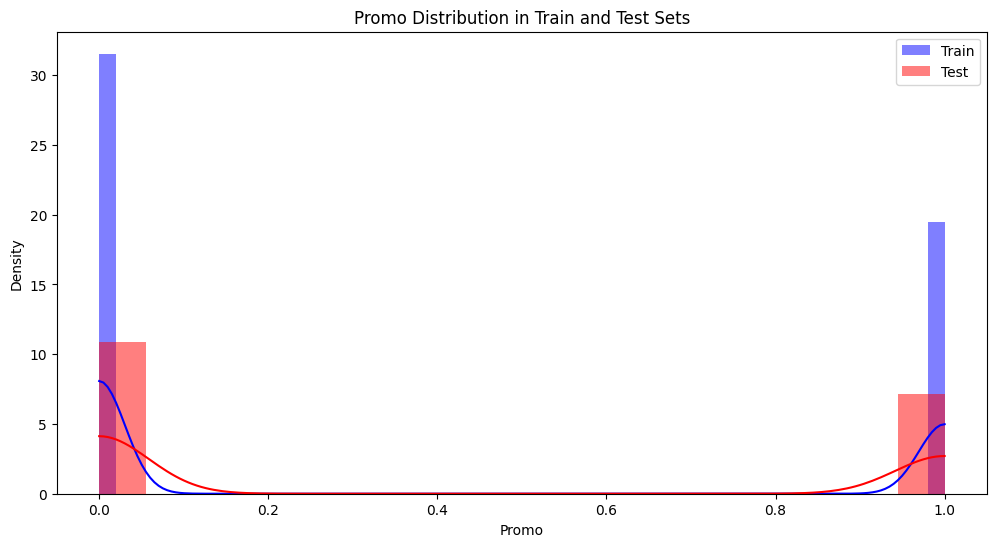

2024-05-28 14:13:54,409 - INFO - Promo distribution plotted for train and test sets


In [3]:
def plot_promo_distribution(train, test):
    plt.figure(figsize=(12, 6))
    sns.histplot(train['Promo'], color='blue', label='Train', kde=True, stat="density", linewidth=0)
    sns.histplot(test['Promo'], color='red', label='Test', kde=True, stat="density", linewidth=0)
    plt.title('Promo Distribution in Train and Test Sets')
    plt.xlabel('Promo')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    logger.info("Promo distribution plotted for train and test sets")

plot_promo_distribution(train, test)

### Sales Behavior Before, During, and After Holidays

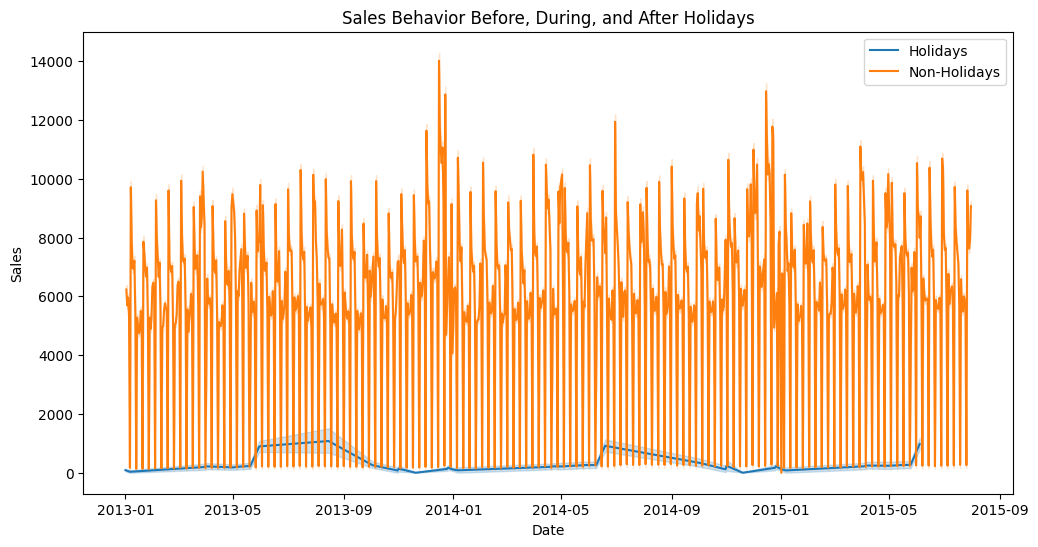

2024-05-28 14:15:07,602 - INFO - Sales behavior before, during, and after holidays plotted


In [4]:
def plot_sales_during_holidays(df):
    holidays = df[df['StateHoliday'] != '0']
    non_holidays = df[df['StateHoliday'] == '0']
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=holidays, x='Date', y='Sales', label='Holidays')
    sns.lineplot(data=non_holidays, x='Date', y='Sales', label='Non-Holidays')
    plt.title('Sales Behavior Before, During, and After Holidays')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    logger.info("Sales behavior before, during, and after holidays plotted")

plot_sales_during_holidays(train)

### Seasonal Purchase Behaviors

2024-05-28 14:16:35,429 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 14:16:35,957 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


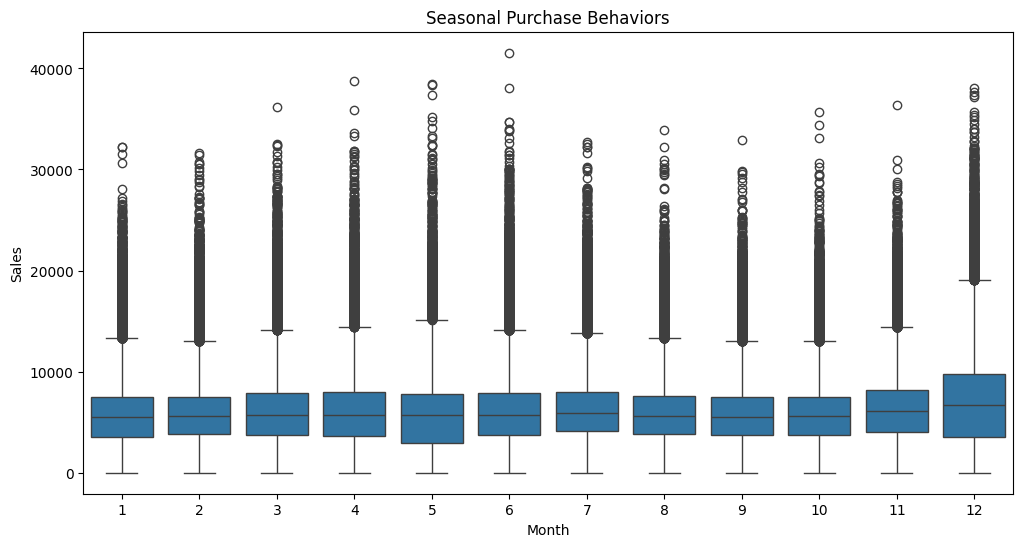

2024-05-28 14:16:36,271 - INFO - Seasonal purchase behavior plotted


In [5]:
def plot_seasonal_behavior(df):
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Sales', data=df)
    plt.title('Seasonal Purchase Behaviors')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Seasonal purchase behavior plotted")

plot_seasonal_behavior(train)

### Correlation Between Sales and Number of Customers

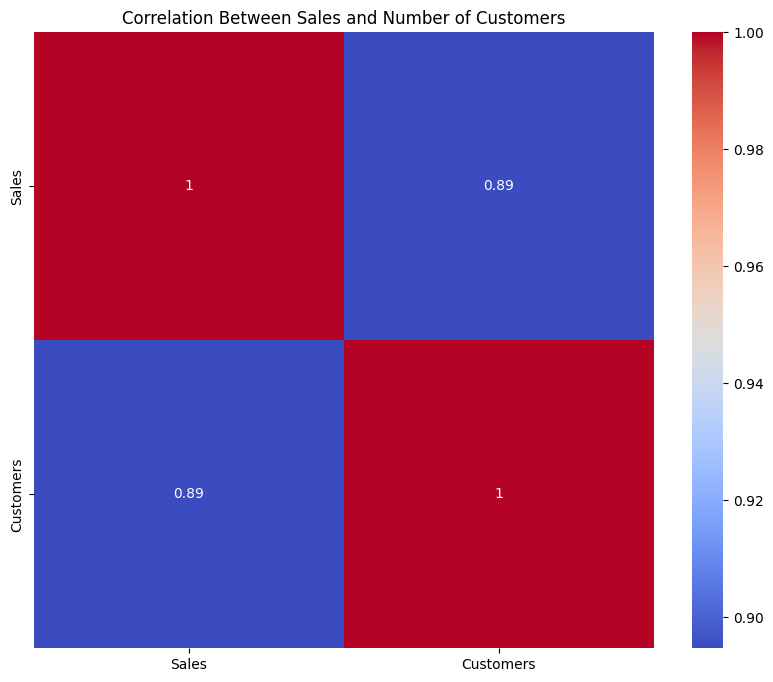

2024-05-28 14:17:34,374 - INFO - Correlation between sales and number of customers plotted


In [6]:
def plot_sales_customers_correlation(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[['Sales', 'Customers']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Sales and Number of Customers')
    plt.show()
    logger.info("Correlation between sales and number of customers plotted")

plot_sales_customers_correlation(train)

### Impact of Promotions on Sales and Customer Count

2024-05-28 14:19:55,832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 14:19:56,273 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


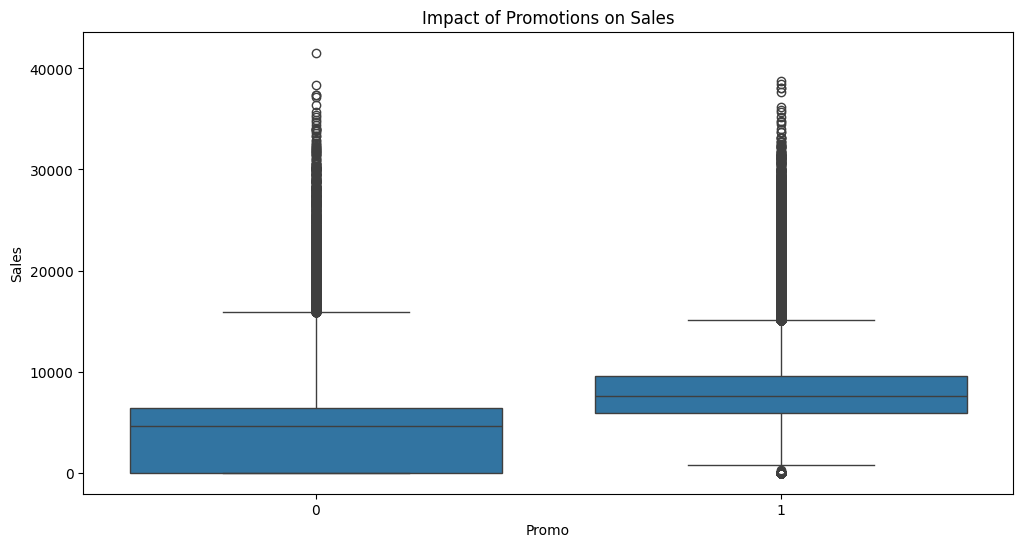

2024-05-28 14:19:56,988 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 14:19:57,403 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


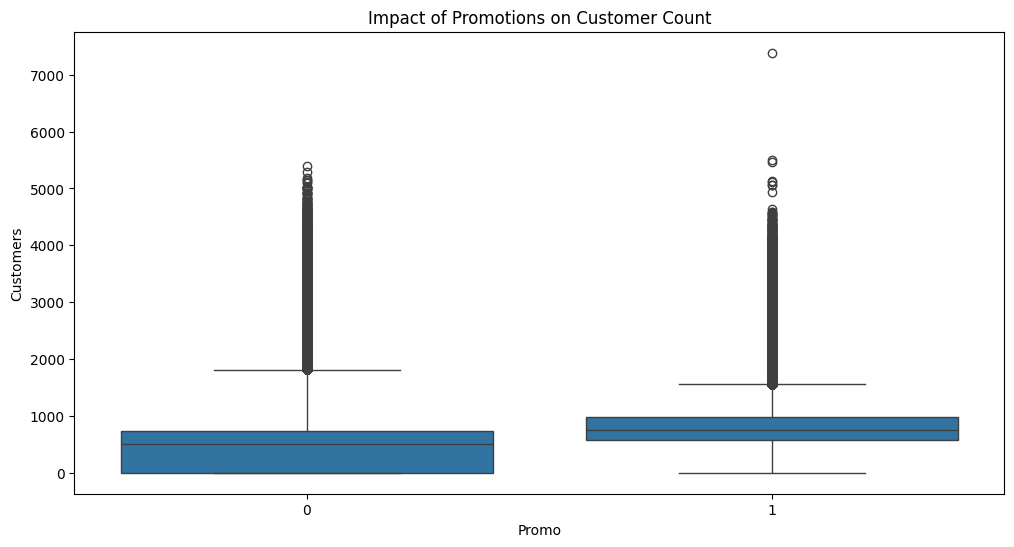

2024-05-28 14:19:57,821 - INFO - Impact of promotions on sales and customer count plotted


In [7]:
def plot_promo_impact(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Promo', y='Sales', data=df)
    plt.title('Impact of Promotions on Sales')
    plt.xlabel('Promo')
    plt.ylabel('Sales')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Promo', y='Customers', data=df)
    plt.title('Impact of Promotions on Customer Count')
    plt.xlabel('Promo')
    plt.ylabel('Customers')
    plt.show()
    logger.info("Impact of promotions on sales and customer count plotted")

plot_promo_impact(train)

### Trends of Customer Behavior During Store Opening and Closing Times

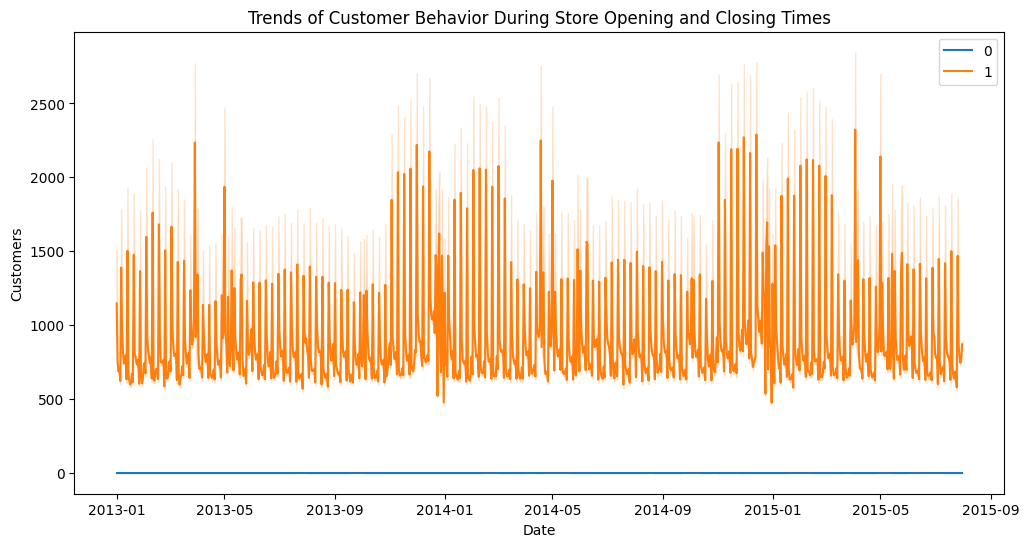

2024-05-28 14:21:47,389 - INFO - Trends of customer behavior during store opening and closing times plotted


In [8]:
def plot_store_opening_closing(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Customers', hue='Open')
    plt.title('Trends of Customer Behavior During Store Opening and Closing Times')
    plt.xlabel('Date')
    plt.ylabel('Customers')
    plt.legend()
    plt.show()
    logger.info("Trends of customer behavior during store opening and closing times plotted")

plot_store_opening_closing(train)

### Store Weekday Opening Analysis

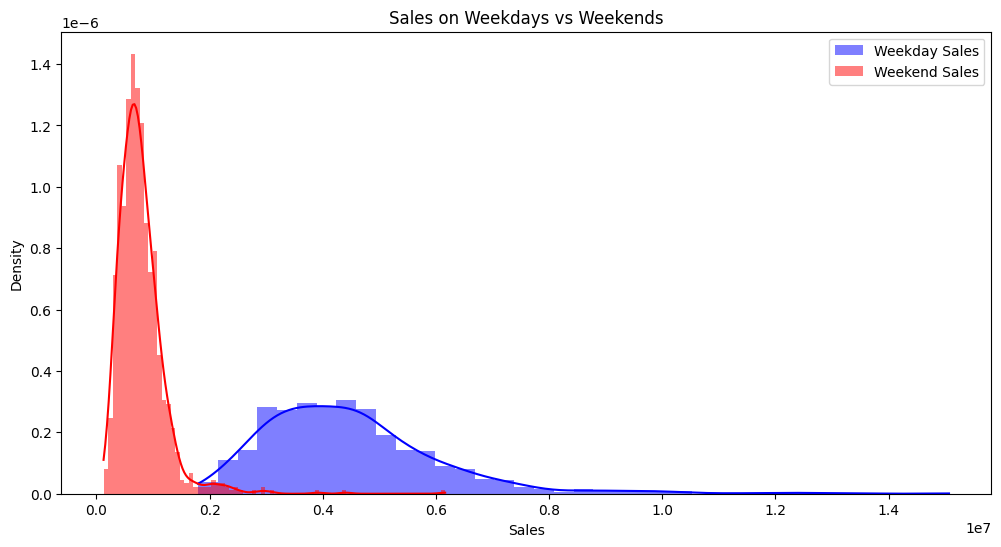

2024-05-28 14:22:23,230 - INFO - Sales on weekdays vs weekends plotted


In [9]:
def plot_weekday_opening_analysis(df):
    weekdays = df[df['Open'] == 1].groupby(['Store', 'DayOfWeek'])['Sales'].sum().unstack().fillna(0)
    weekdays['TotalSales'] = weekdays.sum(axis=1)
    weekends = weekdays[[5, 6]].sum(axis=1)
    weekdays['WeekendSales'] = weekends
    weekdays['WeekdaySales'] = weekdays['TotalSales'] - weekdays['WeekendSales']

    plt.figure(figsize=(12, 6))
    sns.histplot(weekdays['WeekdaySales'], color='blue', label='Weekday Sales', kde=True, stat="density", linewidth=0)
    sns.histplot(weekends, color='red', label='Weekend Sales', kde=True, stat="density", linewidth=0)
    plt.title('Sales on Weekdays vs Weekends')
    plt.xlabel('Sales')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    logger.info("Sales on weekdays vs weekends plotted")

plot_weekday_opening_analysis(train)

### Assortment Type Impact on Sales

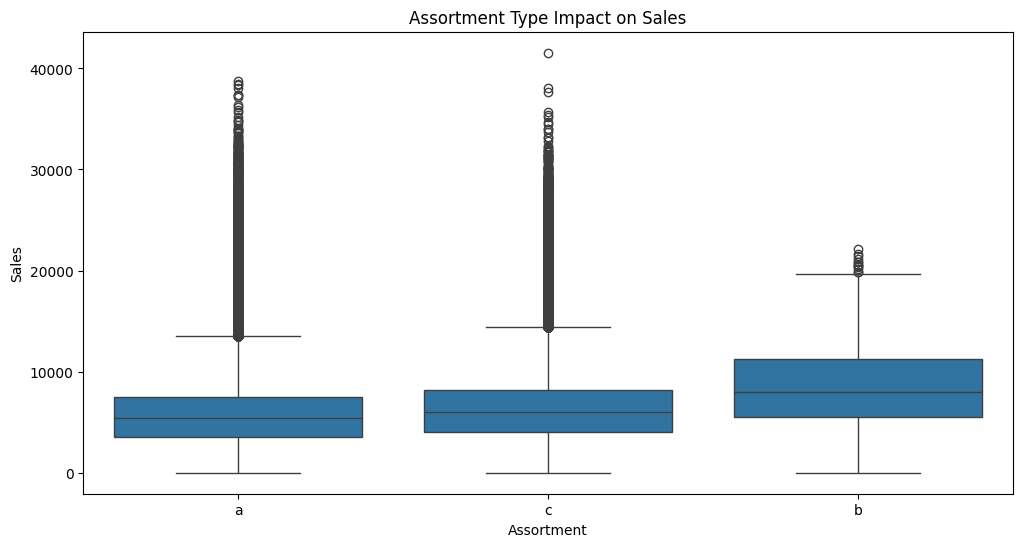

2024-05-28 14:23:09,916 - INFO - Assortment type impact on sales plotted


In [10]:
def plot_assortment_type_impact(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Assortment', y='Sales', data=df)
    plt.title('Assortment Type Impact on Sales')
    plt.xlabel('Assortment')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Assortment type impact on sales plotted")

plot_assortment_type_impact(train)

### Distance to Competitor Impact on Sales

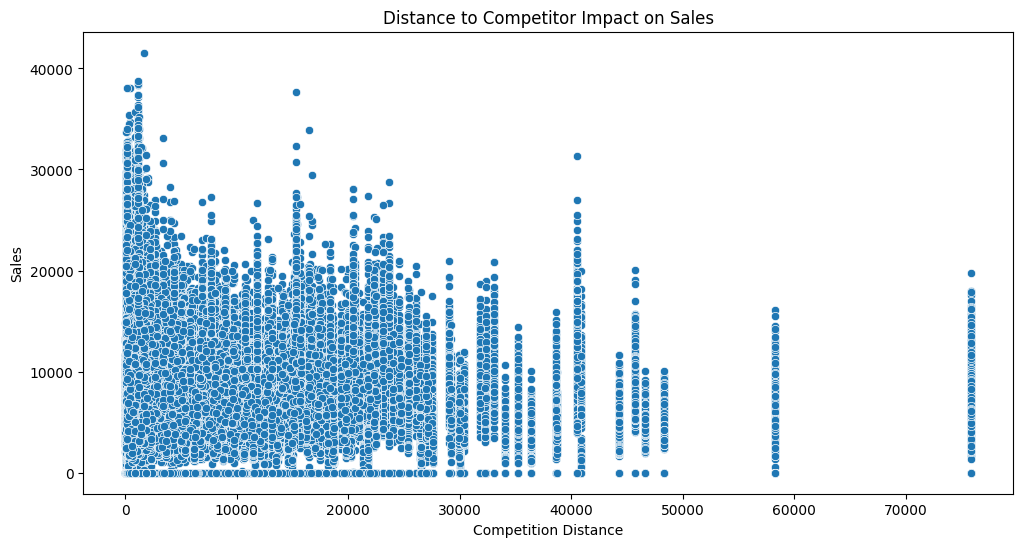

2024-05-28 14:24:33,142 - INFO - Distance to competitor impact on sales plotted


In [11]:
def plot_competition_distance_impact(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
    plt.title('Distance to Competitor Impact on Sales')
    plt.xlabel('Competition Distance')
    plt.ylabel('Sales')
    plt.show()
    logger.info("Distance to competitor impact on sales plotted")

plot_competition_distance_impact(train)

### Impact of Opening/Reopening New Competitors

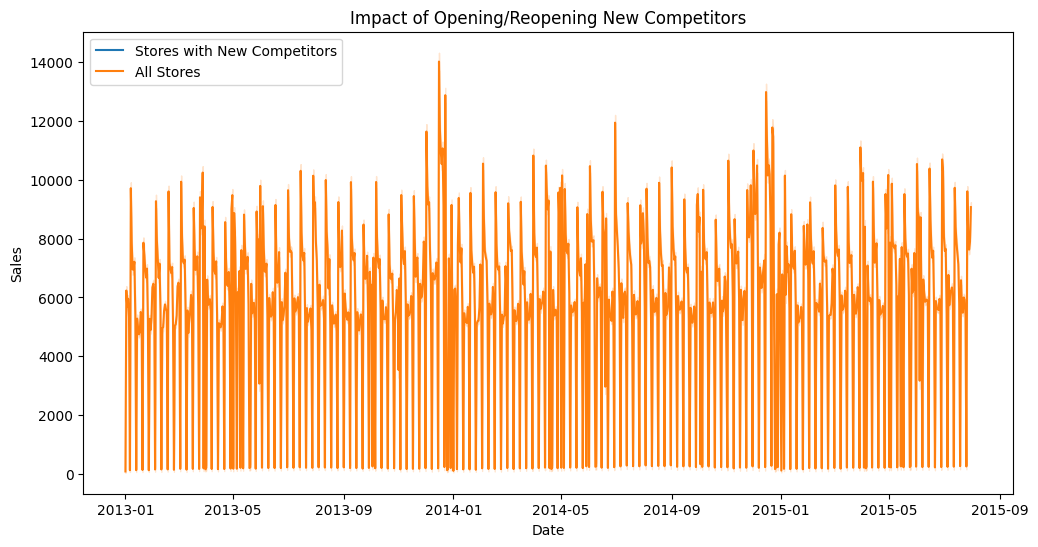

2024-05-28 14:26:20,945 - INFO - Impact of opening/reopening new competitors plotted


In [12]:
def plot_new_competitors_impact(df):
    # Identify stores with NA in CompetitionDistance initially and later have values
    new_competitors = df[(df['CompetitionOpenSinceMonth'] > 0) & (df['CompetitionDistance'] == 0)]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=new_competitors, x='Date', y='Sales', label='Stores with New Competitors')
    sns.lineplot(data=df, x='Date', y='Sales', label='All Stores')
    plt.title('Impact of Opening/Reopening New Competitors')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    logger.info("Impact of opening/reopening new competitors plotted")

plot_new_competitors_impact(train)

In [1]:
# Check Data Types
print(eda.data.dtypes)

# Inspect Data
print(eda.data.head())

# Handle Date Columns
# Convert 'Date' column to datetime
eda.data['Date'] = pd.to_datetime(eda.data['Date'])

# Extract year, month, and day features
eda.data['Year'] = eda.data['Date'].dt.year
eda.data['Month'] = eda.data['Date'].dt.month
eda.data['Day'] = eda.data['Date'].dt.day

# Drop the original 'Date' column if no longer needed
eda.data.drop(columns=['Date'], inplace=True)

# Print the updated DataFrame to verify changes
print(eda.data.head())

NameError: name 'eda' is not defined

d:\sales_forecasting\scripts\eda.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.data_path)


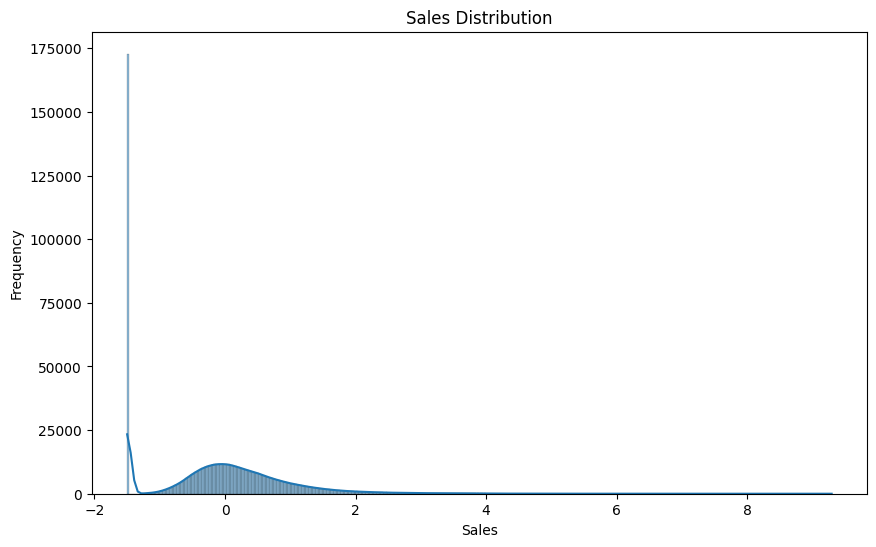

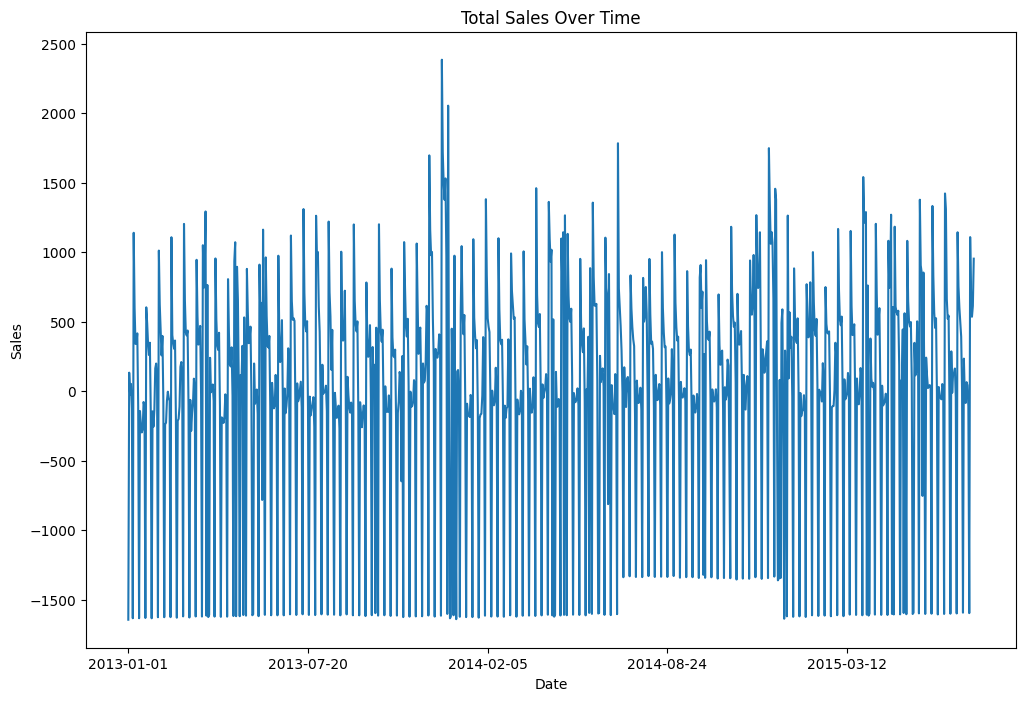

ValueError: could not convert string to float: '2015-07-31'

<Figure size 1000x800 with 0 Axes>

In [25]:
# notebooks/01_eda.ipynb
import sys
import os

# Append the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scripts.eda import EDA

# Initialize EDA class
eda = EDA(data_path='../data/processed/train_processed.csv')

# Load data
eda.load_data()

# Plot sales distribution
eda.plot_sales_distribution()

# Plot sales over time
eda.plot_sales_over_time()

# Plot correlation heatmap
eda.plot_correlation_heatmap()